# Weak lensing map and cosmic web slice plotter code:

This is a notebook that illustrates the process of loading the trained cosmoGAN checkpoints and plots some images. The following python (version 3.6) libraries are used in this notebook: **tensorflow** (version 1.14.0), **cv2** (version 4.1.1), **numpy** (version 1.17.3), **matplotlib** (version 3.1.1). In case of any problems regarding the version of tensorflow, try installing a fresh conda environment (**conda create -n myenv python=3.6**) and then install tensorflow with version 1.14.0 (**pip install tensorflow==1.14.0**). 

** Importing the packages: **

In [1]:
import os
import tensorflow as tf
import sys
import time
import numpy as np
import pprint
import matplotlib.pyplot as plt
from functions import *
import matplotlib.colors as pltcolors
import cv2
import warnings
warnings.filterwarnings('ignore')

** Chekpoint settings: **

Here we load the checkpoints saved during training. To use the code for plotting your own pre-saved results, change the checkpoint_name and the other settings accordingly. **z** here is the size of the random noise input vector, **output_size** is the size of the output images and the **batch_size** parameter is the number of output images to be produced. Note that **batch_size** has to be the same as it was set during the training process otherwise the checkpoint will not be loaded correctly. 

In [2]:
## Checkpoint path and name:
checkpoint_name = "cosmoGAN_original"
checkpoint_dir_pt = './checkpoints/' + checkpoint_name + '/' + 'run_0' ## All checkpoints are saved along with their run number

checkpoint_epoch = 30000 ## if checkpoint_epoch > max checkpoint epoch trained, the most recent checkpoint will be loaded
show_plots = True

## The other settings:
z = 64
output_size = 256
batch_size = 64 ## The batch size. Note that if the checkpoint was trained for batch_size=64, the Loader will not work for a different batch size

** Loading the checkpoint: **

In [3]:
z_vector, samples = Loader(checkpoint_dir_pt, checkpoint_epoch, output_size,z) ## Loads some samples





The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./checkpoints/cosmoGAN_original/run_0/dcgan.model-step-206
 [*] Success to read dcgan.model-step-206
 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/cosmoGAN_original/run_0/dcgan.model-step-206
 [*] Success to read dcgan.model-step-206


** Plotting: **

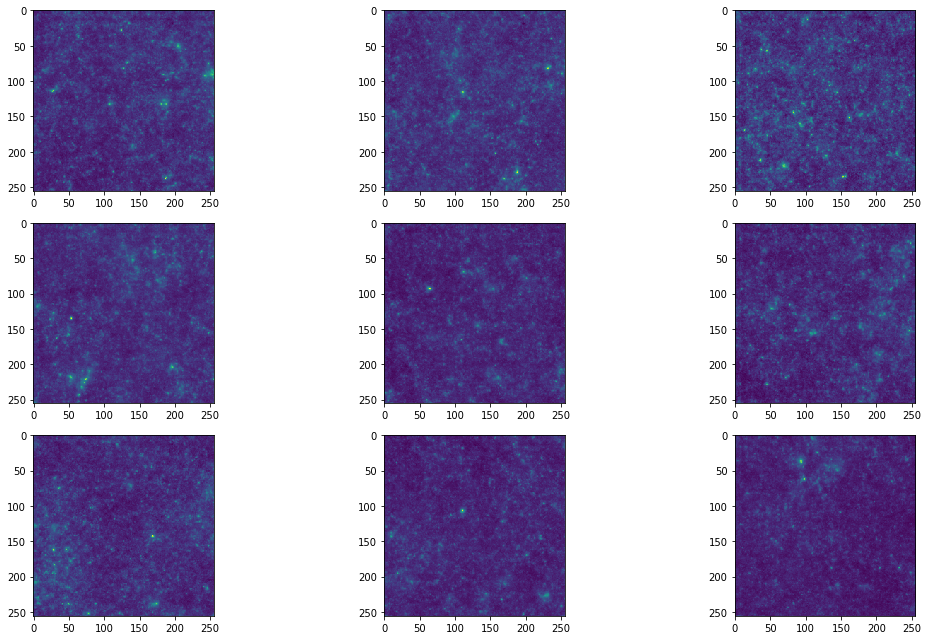

In [4]:
N = 9
fig = plt.figure(figsize=(16,9))
for i in range(1,N+1):
    plt.subplot(3, 3, i)
    plt.imshow(np.squeeze(samples[i]),cmap=None);
plt.tight_layout()


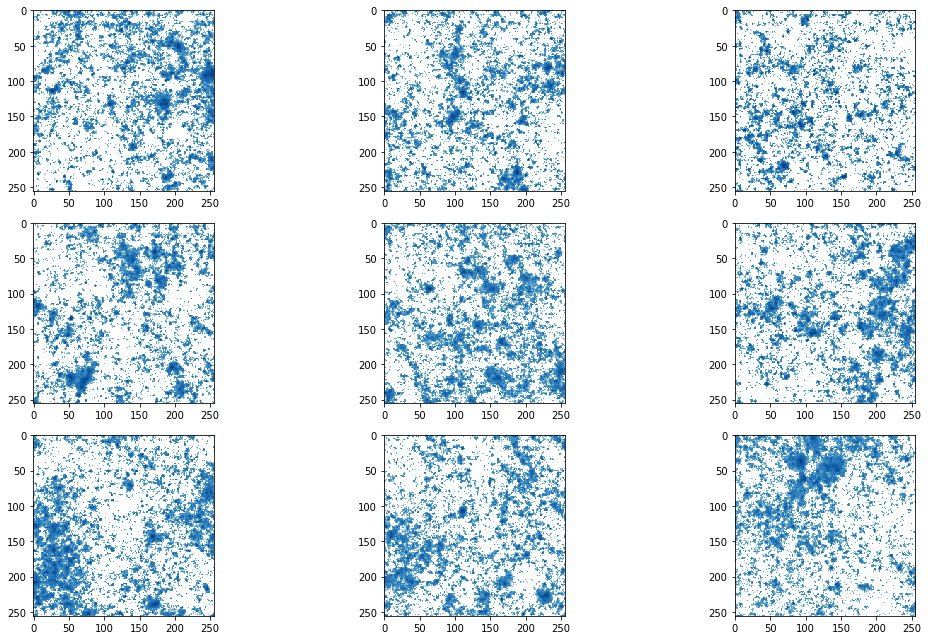

In [5]:
## Or in a single figure:

fig = plt.figure(figsize=(16,9))
for i in range(1,N+1):
    plt.subplot(3, 3, i)
    norm = pltcolors.LogNorm(1e-4, samples[i].max(), clip='True')
    plt.imshow(np.squeeze(samples[i]),norm=norm,cmap="Blues");
plt.tight_layout()


** Cosmic web slices: **

Here we load a checkpoint from cosmoGAN trained on cosmic web slices of two different redshifts: {0.0,1.0}. We apply some Gaussian smoothing to remove the shot noise on small scales following the advice in Rodriguez et al. 2018 (https://arxiv.org/abs/1801.09070)

In [6]:
checkpoint_name = "checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0"
checkpoint_dir_pt = './checkpoints/' + checkpoint_name + '/' + 'run_0' ## All checkpoints are save along with their run number

checkpoint_epoch = 30000 
show_plots = True

## The other settings:
z = 256
output_size = 256
batch_size = 64 ## The batch size. Note that if the checkpoint was trained for batch_size=64, the Loader will not work for a different batch size

In [7]:
z_vector, samples = Loader(checkpoint_dir_pt, checkpoint_epoch, output_size,z) ## Loads some samples

 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500
 [*] Reading checkpoints...
Checkpoint for  epoch epoch doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_lr_0p00003_redshift_z0p0_z1p0/run_0/dcgan.model-step-28500
 [*] Success to read dcgan.model-step-28500


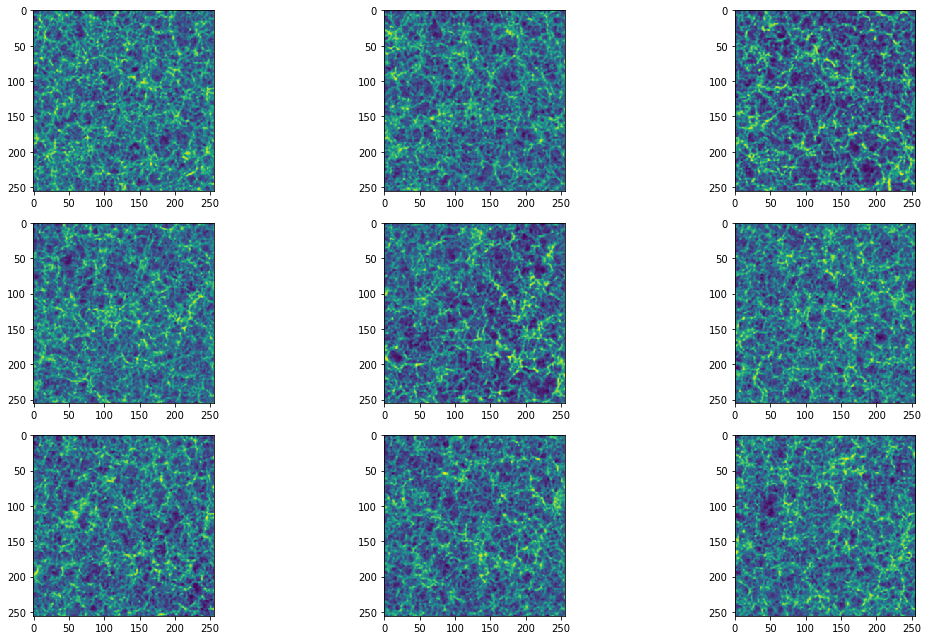

In [8]:
N = 9
fig = plt.figure(figsize=(16,9))
for i in range(1,N+1):
    plt.subplot(3, 3, i)
    plt.imshow(cv2.GaussianBlur(np.squeeze(samples[i]),(3,3),0),cmap=None); ## Here we apply standard Gaussian smoothing
plt.tight_layout()

** Illustris DM, GAS, internal energy cosmic web slices: **

In [9]:
from functions_illustris import *

checkpoint_name = "checkpoints_cw_scaled_z0p0_256_a_1000_illustris_energy"
#checkpoint_name = "checkpoints_cw_scaled_z0p0_256_a_1000_illustris/"
checkpoint_dir_pt = './checkpoints/' + checkpoint_name + '/' + 'run_0' ## All checkpoints are save along with their run number

checkpoint_epoch = 40000
show_plots = True

## The other settings:
z = 256
output_size = 256
batch_size = 64 ## The batch size. Note that if the checkpoint was trained for batch_size=64, the Loader will not work for a different batch size


**Loading the checkpoint:**

In [10]:
z_vector, samples = Loader(checkpoint_dir_pt, checkpoint_epoch, z)


 [*] Reading checkpoints...
Checkpoint for  step step doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_z0p0_256_a_1000_illustris_energy/run_0/dcgan.model-step-34400
 [*] Success to read dcgan.model-step-34400
 [*] Reading checkpoints...
Checkpoint for  step step doesn't exist. Using latest checkpoint instead!
INFO:tensorflow:Restoring parameters from ./checkpoints/checkpoints_cw_scaled_z0p0_256_a_1000_illustris_energy/run_0/dcgan.model-step-34400
 [*] Success to read dcgan.model-step-34400


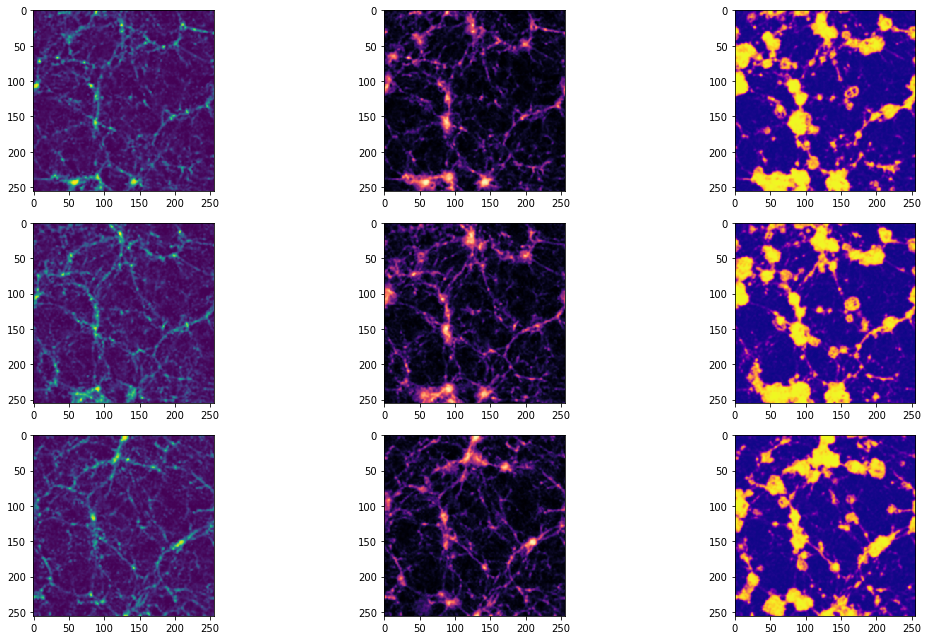

In [11]:
cmaps = [None, 'magma', 'plasma'] ## For DM + GAS + energy

fig = plt.figure(figsize=(16,9))
for i in range(1,4):
    for j in range(0,3):
        plt.subplot(3, 3, (j+1)+(i-1)*3)
        plt.imshow(cv2.GaussianBlur(np.squeeze(samples[i][:,:,j]),(3,3),0), cmap=cmaps[j])
plt.tight_layout()